# Exploratory data analysis

EDA of dataframe created by handling missing values from the original dataset

Importing modules and loading datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/processed/nonait.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


## Univariate analysis

### Distribution of the target variable (TenYearCHD)

<Axes: xlabel='TenYearCHD', ylabel='count'>

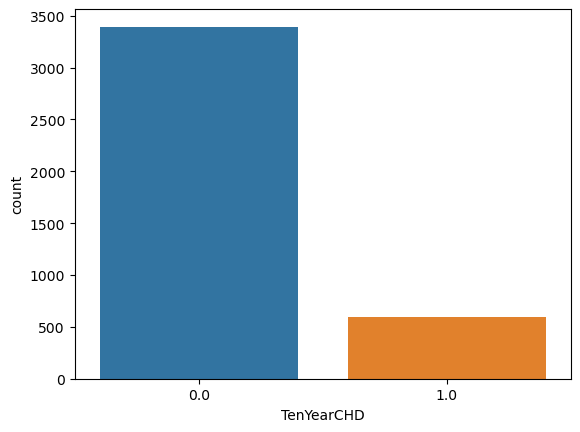

In [4]:
sns.countplot(df,x='TenYearCHD')

### Distribution of others variables.

Since some data is binary and some is continuous we need to show first the binary variables as countplots and then the continuous variables as histograms.

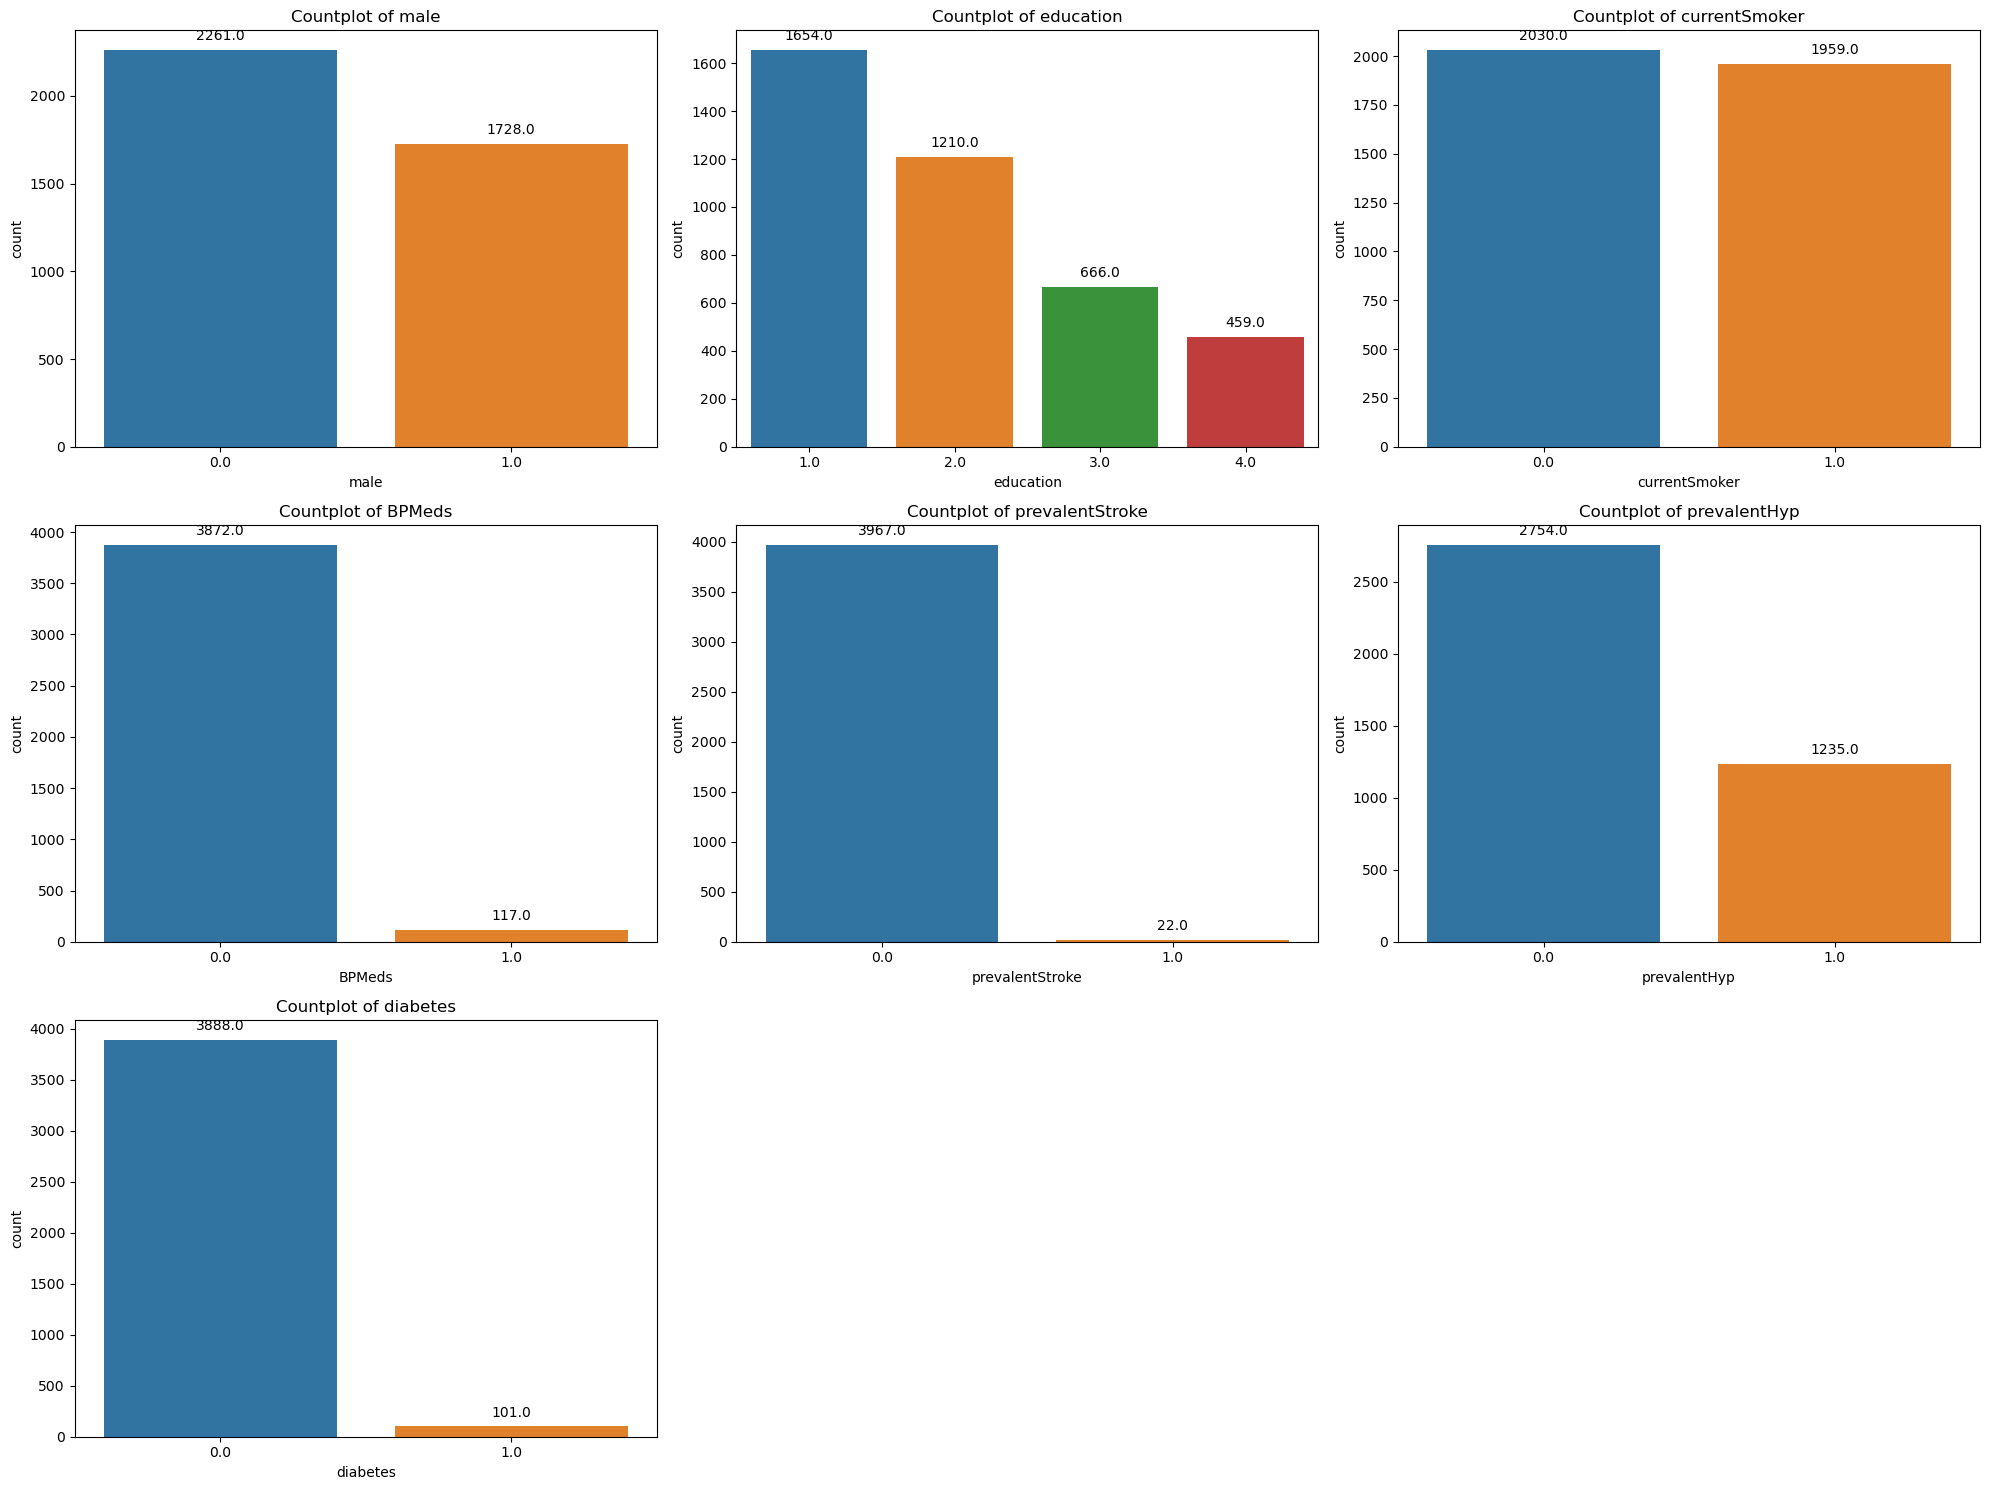

In [7]:
#Visualization of categorical variables
df2 = df.drop(columns=['age','totChol','sysBP','diaBP','BMI','heartRate','TenYearCHD','glucose','cigsPerDay'])

plt.figure(figsize=(20,15))

for i,col in enumerate(df2.columns,1):
    plt.subplot(3,3,i)
    
    unique_vals = sorted(df2[col].unique())
    
    ax = sns.countplot(x=col, data=df2, order=unique_vals)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() /2., p.get_height()),
                    ha = 'center', va='center',
                    xytext=(0,10),
                    textcoords='offset points')
        plt.title(f'Countplot of {col}')
        plt.tight_layout()

plt.show()

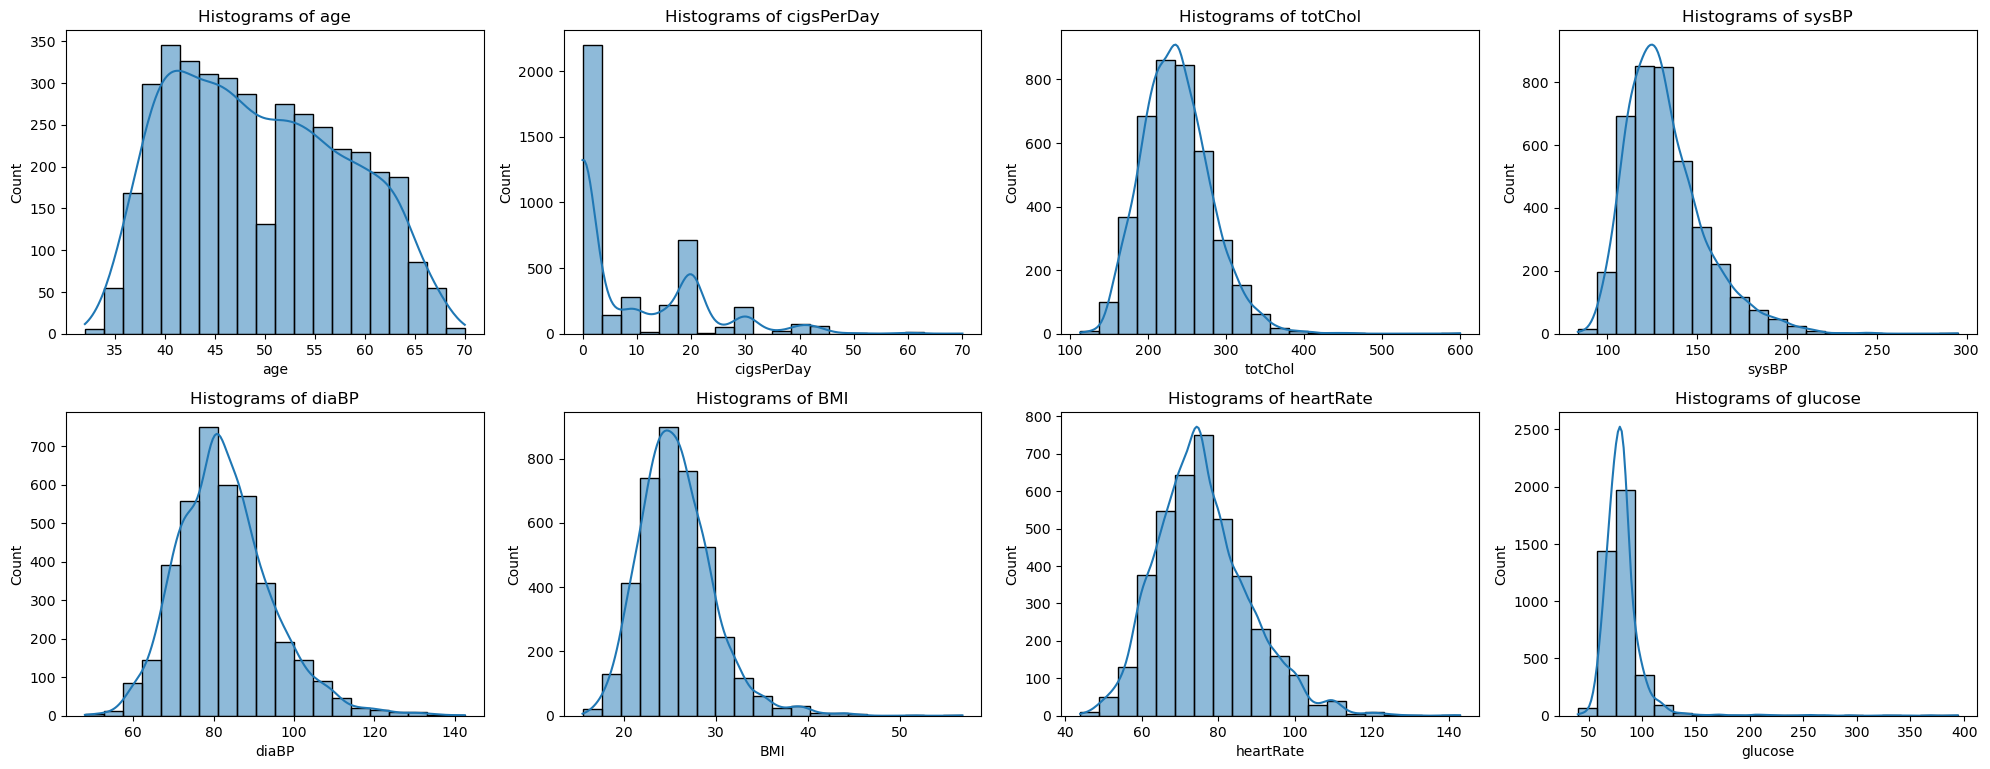

In [9]:
#Visualization of continuous variables.
df3 = df.drop(columns=['TenYearCHD','male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'])

plt.figure(figsize=(20,15))
for i,col in enumerate(df3.columns,1):
    plt.subplot(4,4,i)
    sns.histplot(df3[col],kde=True,bins=20)
    plt.title(f'Histograms of {col}')
    plt.tight_layout()
    
plt.show()

## Correlation of variables

Text(0.5, 1.0, 'Correlation beetwen features')

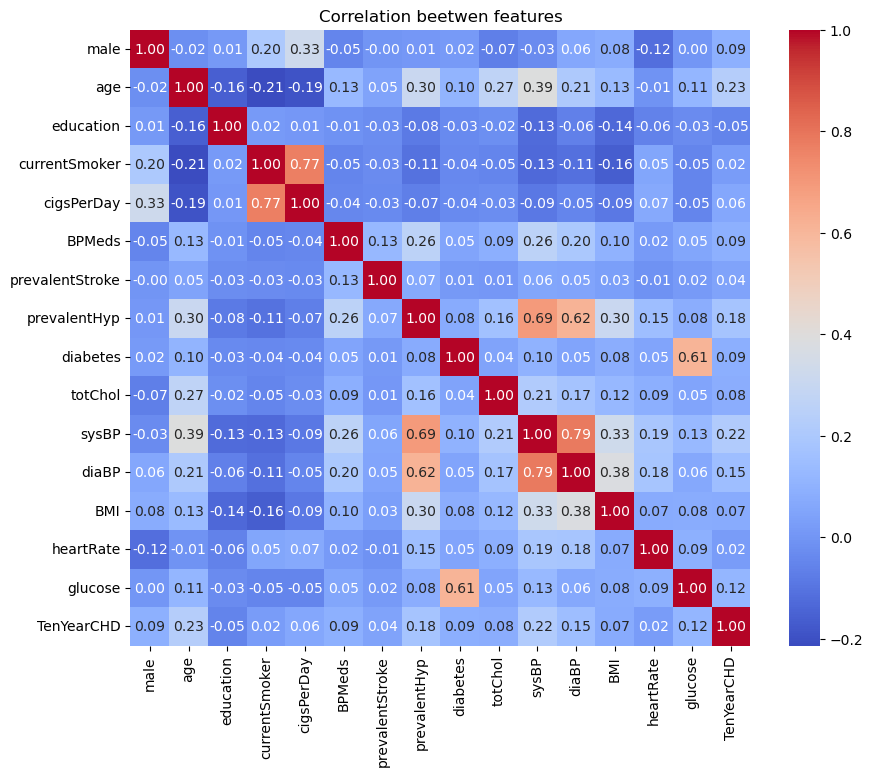

In [10]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation beetwen features')

From the correlations 